In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Load the data
file_path = "Resources/alzheimers_disease_data.csv"
alzheimers_df = pd.read_csv(file_path)

# Display basic information about the DataFrame
alzheimers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [2]:
# Display the first few rows of the DataFrame
alzheimers_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
alzheimers_df.drop(columns=['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [4]:
X = alzheimers_df.copy()
X.drop(columns=['Diagnosis'], axis=1, inplace=True)
X.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,21.463532,6.518877,0,0,1.725883,0,0,0,1,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,20.613267,7.118696,0,0,2.592424,0,0,0,0,1
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.356249,5.895077,0,0,7.119548,0,1,0,1,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,13.991127,8.965106,0,1,6.481226,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,13.517609,6.045039,0,0,0.014691,0,0,1,1,0


In [5]:
y = alzheimers_df['Diagnosis'].values.reshape(-1, 1)

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [7]:
scaler = StandardScaler()

In [8]:
X_scaler = scaler.fit(X_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Decision Tree

In [10]:
model = tree.DecisionTreeClassifier(random_state = 5)

In [11]:
model = model.fit(X_train_scaled, y_train)

In [12]:
predictions = model.predict(X_test_scaled)

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,252,32
Actual 1,16,130


Accuracy Score : 0.8883720930232558
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       284
           1       0.80      0.89      0.84       146

    accuracy                           0.89       430
   macro avg       0.87      0.89      0.88       430
weighted avg       0.89      0.89      0.89       430



# Gradient Boost Model

In [15]:
gbc = GradientBoostingClassifier(random_state = 5, n_estimators=800, max_depth=5)

gbc.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=5, n_estimators=800, random_state=5)

In [16]:
gbc_predictions = gbc.predict(X_test_scaled)

In [17]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_gbc = confusion_matrix(y_test, gbc_predictions)
cm_df_gbc = pd.DataFrame(
    cm_gbc, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_gbc = accuracy_score(y_test, gbc_predictions)

In [18]:
#display the results of the model evaluation
display(cm_df_gbc)
print(f"Accuracy Score: {acc_score_gbc}")
print(classification_report(y_test, gbc_predictions))

,Predicted 0,Predicted 1
Actual 0,272,12
Actual 1,10,136


Accuracy Score: 0.9488372093023256
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       284
           1       0.92      0.93      0.93       146

    accuracy                           0.95       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



In [19]:
# Gradient Boost in sklearn will automatically calculate feature importance
importances = gbc.feature_importances_
# We can sort the features by their importance
sorted(zip(gbc.feature_importances_, X.columns), reverse=True)

[(0.23523298758181202, 'ADL'),
 (0.21175436495682456, 'MMSE'),
 (0.17768362572028903, 'FunctionalAssessment'),
 (0.1383122142066374, 'MemoryComplaints'),
 (0.11974881077751429, 'BehavioralProblems'),
 (0.01908183401426381, 'DietQuality'),
 (0.013828717767428967, 'PhysicalActivity'),
 (0.012963833253157517, 'CholesterolHDL'),
 (0.01174301632062477, 'CholesterolTotal'),
 (0.011357447937917306, 'CholesterolTriglycerides'),
 (0.008862924168044486, 'CholesterolLDL'),
 (0.006624813203989413, 'Age'),
 (0.005921995353145712, 'AlcoholConsumption'),
 (0.005613462390282782, 'SleepQuality'),
 (0.005480658384815084, 'BMI'),
 (0.003607443045184329, 'SystolicBP'),
 (0.0026509413881889714, 'EducationLevel'),
 (0.0022147243241996436, 'CardiovascularDisease'),
 (0.002132695362082546, 'DiastolicBP'),
 (0.0014049050232696413, 'Gender'),
 (0.0007258928299540313, 'DifficultyCompletingTasks'),
 (0.0005300728921435123, 'Ethnicity'),
 (0.0005043280595256013, 'Smoking'),
 (0.0003942778113811037, 'Disorientation

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

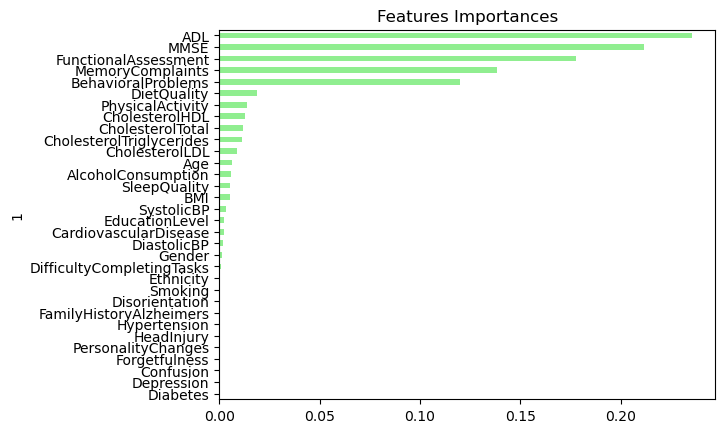

In [20]:
# Visualize the features by importance
gbc_importances_df = pd.DataFrame(sorted(zip(gbc.feature_importances_, X.columns), reverse=True))
gbc_importances_df.set_index(gbc_importances_df[1], inplace=True)
gbc_importances_df.drop(columns=1, inplace=True)
gbc_importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = gbc_importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Random Forest

In [21]:
# Import Random Forest Dependencies
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier(random_state = 5, n_estimators=800)

In [23]:
rf_model.fit(X_train_scaled, y_train) 

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=800, random_state=5)

In [24]:
predictions = rf_model.predict(X_test_scaled)

In [25]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [26]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,275,9
Actual 1,13,133


Accuracy Score : 0.9488372093023256
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       284
           1       0.94      0.91      0.92       146

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



In [27]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.17667701280489212, 'FunctionalAssessment'),
 (0.16458977051172283, 'ADL'),
 (0.12175996467938265, 'MMSE'),
 (0.08182935094152656, 'MemoryComplaints'),
 (0.049320849215500055, 'BehavioralProblems'),
 (0.031215918921627995, 'DietQuality'),
 (0.030925168990734647, 'CholesterolTriglycerides'),
 (0.03091842126816543, 'PhysicalActivity'),
 (0.02961191143466318, 'BMI'),
 (0.029587325936302894, 'CholesterolTotal'),
 (0.029364430915026947, 'SleepQuality'),
 (0.029118919901136874, 'AlcoholConsumption'),
 (0.02898172584657239, 'CholesterolHDL'),
 (0.028259575294023037, 'CholesterolLDL'),
 (0.02502180104213033, 'SystolicBP'),
 (0.024680040108724866, 'Age'),
 (0.024022681032589695, 'DiastolicBP'),
 (0.010328893138245024, 'EducationLevel'),
 (0.007975307835427955, 'Ethnicity'),
 (0.004376994851331567, 'Gender'),
 (0.003898509007617496, 'Smoking'),
 (0.0038655291851284225, 'FamilyHistoryAlzheimers'),
 (0.003864352183235279, 'Hypertension'),
 (0.0038151797402831275, 'Forgetfulness'),
 (0.003652555

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

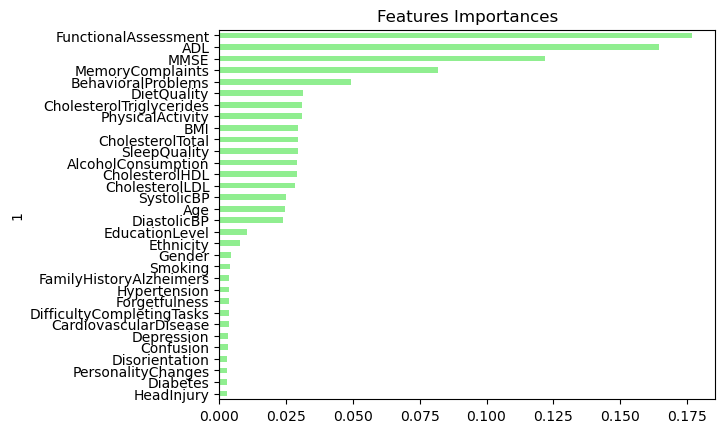

In [28]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Gradient Boost of Top 10

In [29]:
#get the top 10 in the feature importances as a list
top_10 = gbc_importances_df.index.to_list()[:10]

#top 10 features df
Xtop10 = alzheimers_df[top_10]

#re-do train-test split with top 10 features df
X_train_top10, X_test_top10, y_train, y_test = train_test_split(Xtop10, y, test_size=0.2, random_state = 5)
X_train_top10.shape

(1719, 10)

In [30]:
#Scale the features
scaler = StandardScaler()
X_scaler_top10 = scaler.fit(X_train_top10)
X_train_scaled_top10 = X_scaler_top10.transform(X_train_top10)
X_test_scaled_top10 = X_scaler_top10.transform(X_test_top10)

In [31]:
#Create a Gradient Boosting Classifier
gbc_top10 = GradientBoostingClassifier(random_state = 5)
#Fit the model
gbc_top10.fit(X_train_scaled_top10, y_train)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=5)

In [32]:
#Make predictions using the testing data
gbc_predictions_top10 = gbc_top10.predict(X_test_scaled_top10)

In [33]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_gbc_top10 = confusion_matrix(y_test, gbc_predictions_top10)
cm_df_gbc_top10 = pd.DataFrame(
    cm_gbc_top10, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_gbc_top10 = accuracy_score(y_test, gbc_predictions_top10)

In [34]:
#display the results of the model evaluation
display(cm_df_gbc_top10)
print(f"Accuracy Score: {acc_score_gbc_top10}")
print(classification_report(y_test, gbc_predictions_top10))

,Predicted 0,Predicted 1
Actual 0,274,10
Actual 1,9,137


Accuracy Score: 0.9558139534883721
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       284
           1       0.93      0.94      0.94       146

    accuracy                           0.96       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430

